# AI・プログラミング基礎演習 第3回

関数 visualize と train を定義しているセルは編集せずにそのまま実行してください

In [56]:
import matplotlib.pyplot as plt
import matplotlib.colors as colors

# --------------------------------------------------------------
# モデルの予測とデータを可視化をする関数
# --------------------------------------------------------------
def visualize():
    X_tensor = torch.from_numpy(X).float()
    with torch.no_grad():
        logits = model(X_tensor)
        preds = torch.sigmoid(logits).cpu().numpy().ravel()
        pred_labels = (preds > 0.5).astype(int)
    true_labels = y

    # 精度表示（正解率）
    accuracy = (pred_labels == true_labels).mean()
    print(f"Accuracy on X: {accuracy:.4f}")

    # 決定境界を描くためのグリッド
    x1_min, x1_max = df['x1'].min(), df['x1'].max()
    x2_min, x2_max = df['x2'].min(), df['x2'].max()
    pad = 0.2 * max(x1_max - x1_min, x2_max - x2_min)
    xx, yy = np.meshgrid(
        np.linspace(x1_min - pad, x1_max + pad, 300),
        np.linspace(x2_min - pad, x2_max + pad, 300),
    )
    grid = np.c_[xx.ravel(), yy.ravel()]
    with torch.no_grad():
        grid_tensor = torch.from_numpy(grid).float()
        logits_grid = model(grid_tensor)
        preds_grid = torch.sigmoid(logits_grid).cpu().numpy().reshape(xx.shape)

    # プロット
    plt.figure(figsize=(8,6))
    cmap = colors.LinearSegmentedColormap.from_list('blue_white_red', ['blue', 'white', 'red'])
    norm = colors.TwoSlopeNorm(vmin=0.0, vcenter=0.5, vmax=1.0)
    contf = plt.contourf(xx, yy, preds_grid, levels=np.linspace(0.0, 1.0, 51), cmap=cmap, norm=norm, alpha=0.6)
    plt.contour(xx, yy, preds_grid, levels=[0.5], colors='k', linewidths=2, linestyles='--')
    plt.scatter(X[:,0], X[:,1], c=true_labels, cmap='bwr', edgecolor='k', s=40)
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.title(f'Predictions (accuracy={accuracy:.3f})')
    plt.colorbar(contf, label='P(y=1)')
    plt.axis('equal')
    plt.tight_layout()
    plt.xlim(x1_min - pad, x1_max + pad)
    plt.ylim(x2_min - pad, x2_max + pad)
    plt.show()

In [57]:
import torch
import torch.nn as nn
import torch.optim as optim

# --------------------------------------------------------------
# モデルの学習をする関数
# --------------------------------------------------------------
def train():
    # データをTorchのTensorに変換
    X_tensor = torch.from_numpy(X).float()
    y_tensor = torch.from_numpy(y).float().unsqueeze(1)

    # データセットとデータローダー
    dataset = torch.utils.data.TensorDataset(X_tensor, y_tensor)
    loader = torch.utils.data.DataLoader(dataset, batch_size=32, shuffle=True)

    # オプティマイザ（パラメタ更新するもの）
    optimizer = optim.SGD(model.parameters(), lr=0.01)
    # 損失関数
    criterion = nn.BCEWithLogitsLoss()

    # 学習のエポック数
    num_epochs = 500

    # 学習のメインループ
    for epoch in range(1, num_epochs + 1):
        epoch_loss = 0.0
        for xb, yb in loader:
            optimizer.zero_grad()
            out = model(xb)                 # shape (batch, 1)
            loss = criterion(out, yb)
            loss.backward()
            optimizer.step()
            epoch_loss += loss.item() * xb.size(0)

        epoch_loss /= len(dataset)
        if epoch % 50 == 0 or epoch == 1:
            print(f"Epoch {epoch:3d} - Loss: {epoch_loss:.6f}")

    # 学習データの精度（正解率）を計算
    with torch.no_grad():
        preds = model(X_tensor)                 # raw outputs
        probs = torch.sigmoid(preds)            # convert to probability for binary labels
        pred_labels = (probs >= 0.5).float()
        accuracy = (pred_labels == y_tensor).float().mean().item()

    print(f"Final loss: {epoch_loss:.6f}, Accuracy: {accuracy:.4f}")

ここから後のセルにプログラムを書きます

---

In [58]:
import pandas as pd
import numpy as np
df = pd.read_csv('data_linear.csv')
X = df[['x1', 'x2']].values
y = df['y'].values
print(X.shape)
print(y.shape)

(200, 2)
(200,)


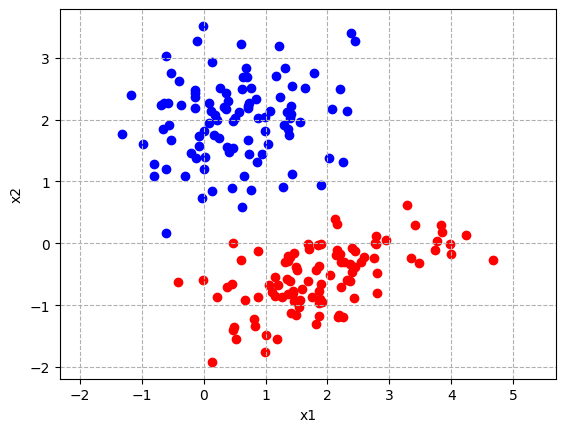

In [59]:
Xpos = X[y == 1]
Xneg = X[y == 0]
plt.scatter(Xpos[:, 0], Xpos[:, 1], c='red')
plt.scatter(Xneg[:, 0], Xneg[:, 1], c='blue')
plt.xlabel('x1')
plt.ylabel('x2')
plt.axis('equal')
plt.grid(linestyle='--')
plt.show()

In [60]:
import torch
import torch.nn as nn
import torch.optim as optim
class LinearRegression2D(nn.Module):
    def __init__(self):
        super().__init__()
# 入力サイズ: 2, 出力サイズ: 1
        self.linear = nn.Linear(2, 1)
def forward(self, x):
# 入力xから出力を求めて戻す
    return self.linear(x)

In [61]:
model = LinearRegression2D()

In [62]:
class MLP(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear1 = nn.Linear(2, 8)
        self.linear2 = nn.Linear(8, 1)
        self.relu = nn.ReLU()
    def forward(self, x):
        x = self.linear1(x)
        x = self.relu(x)
        x = self.linear2(x)
        return x

In [63]:
model = MLP()

Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


Accuracy on X: 0.5000


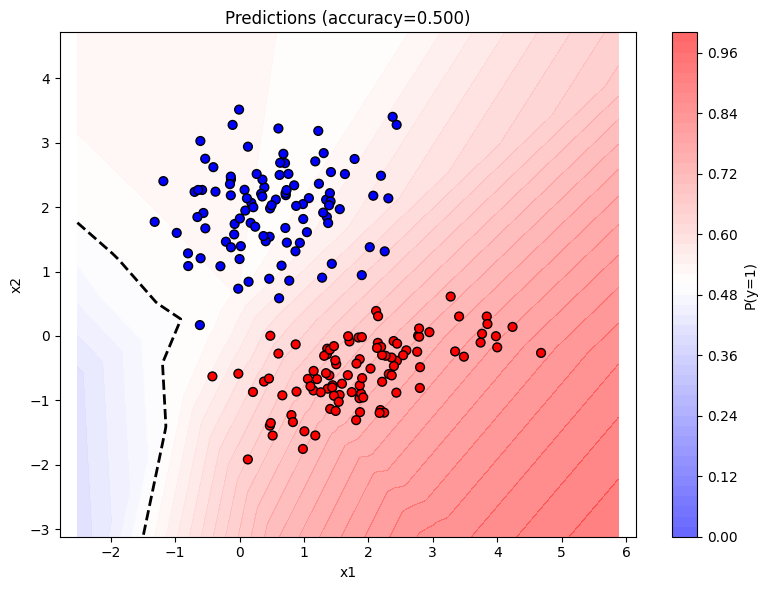

In [64]:
visualize()

In [65]:
train()

Epoch   1 - Loss: 0.555926
Epoch  50 - Loss: 0.128820
Epoch 100 - Loss: 0.057299
Epoch 150 - Loss: 0.036926
Epoch 200 - Loss: 0.027560
Epoch 250 - Loss: 0.022198
Epoch 300 - Loss: 0.018654
Epoch 350 - Loss: 0.016147
Epoch 400 - Loss: 0.014263
Epoch 450 - Loss: 0.012810
Epoch 500 - Loss: 0.011649
Final loss: 0.011649, Accuracy: 1.0000


Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


Accuracy on X: 1.0000


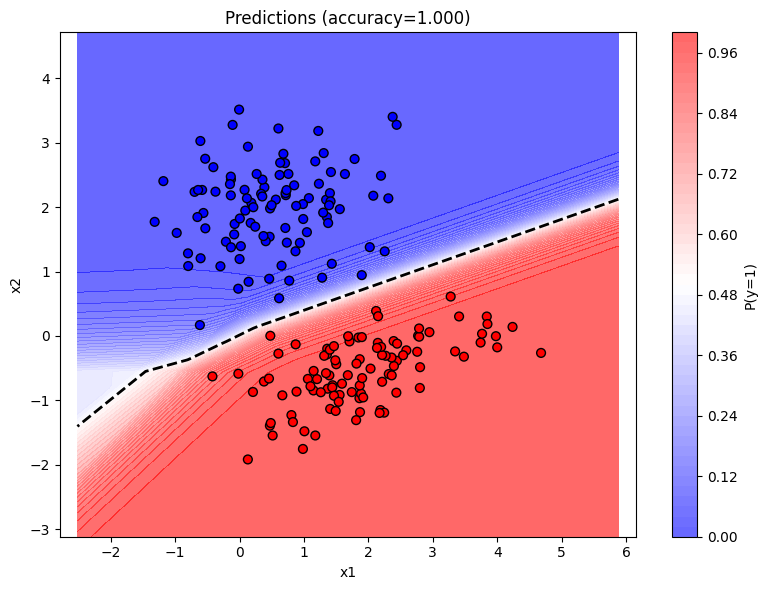

In [66]:
visualize()

In [67]:
class MLP(nn.Module):
    def __init__(self):
        super().__init__()
        self.classifier = nn.Sequential(
            nn.Linear(2, 128),
            nn.ReLU(),
            nn.Linear(128, 128),
            nn.ReLU(),
            nn.Linear(128, 1)
        )

    def forward(self, x):
        return self.classifier(x)

In [68]:
model = MLP()

Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


Accuracy on X: 0.6450


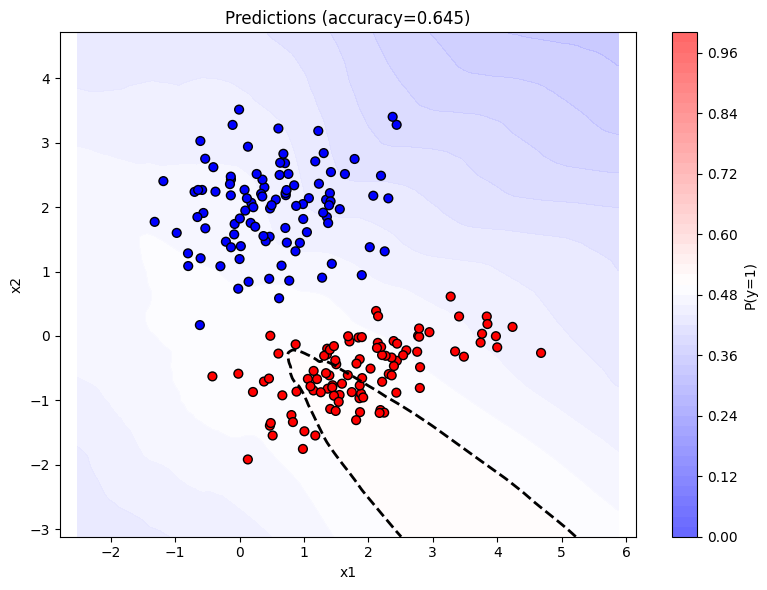

In [69]:
visualize()

In [70]:
train()

Epoch   1 - Loss: 0.634388
Epoch  50 - Loss: 0.038270
Epoch 100 - Loss: 0.018776
Epoch 150 - Loss: 0.012380
Epoch 200 - Loss: 0.009207
Epoch 250 - Loss: 0.007330
Epoch 300 - Loss: 0.006095
Epoch 350 - Loss: 0.005214
Epoch 400 - Loss: 0.004537
Epoch 450 - Loss: 0.004024
Epoch 500 - Loss: 0.003609
Final loss: 0.003609, Accuracy: 1.0000


Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


Accuracy on X: 1.0000


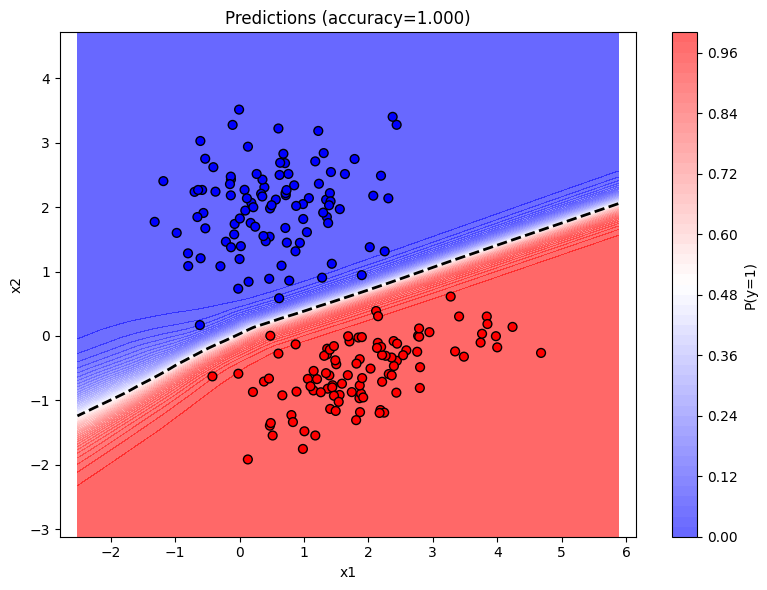

In [71]:
visualize()